In [1]:
from functions import extract_gist_features, diversity_experiment
import numpy as np
import pandas as pd
import seaborn as sns
import os
import tensorflow as tf

Using TensorFlow backend.


In [2]:
# --- constants/globals --- #

# parameter for gist features
NBLOCKS = 4

# training hyperparameters
LR = .005
MOMENTUM = .9
BATCH_SIZE = 32
RUNS = 10
PATIENCE = 2

# dataset parameters
TRAIN_SIZES = [10, 20, 40, 60, 80]
VAL_SIZE = 1000
RUNS = 10

In [3]:
# load the cifar-10 data
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# reshape to have channels
x_train = x_train.reshape([x_train.shape[0], 
                           x_train.shape[1], 
                           x_train.shape[2], 
                           1])
x_train = np.concatenate([x_train, x_train, x_train], 3)
y_train = y_train.reshape([y_train.shape[0], 1])
x_test = x_test.reshape([x_test.shape[0], 
                         x_test.shape[1], 
                         x_test.shape[2], 
                         1])
x_test = np.concatenate([x_test, x_test, x_test], 3)
y_test = y_test.reshape([y_test.shape[0], 1])

# vgg16 requires at least 32x32
x_train = np.pad(x_train,
                 ((0, 0), (2, 2), (2, 2), (0, 0)), 
                 'constant', constant_values=0)
x_test = np.pad(x_test, 
                ((0, 0), (2, 2), (2, 2), (0, 0)), 
                'constant', constant_values=0)

In [4]:
# extract gist features
if 'mnist_gist_features.npy' not in os.listdir():
    x_gist = extract_gist_features(x_train, 
                                   NBLOCKS)
    np.save('./mnist_gist_features.npy', x_gist)
else:
    x_gist = np.load('mnist_gist_features.npy')

In [5]:
# perform experiment
results_df = diversity_experiment(x_train, y_train, x_gist, 
                                  x_test, y_test, 
                                  train_sizes=TRAIN_SIZES,
                                  val_size=VAL_SIZE,
                                  runs=RUNS,
                                  lr=LR, momentum=MOMENTUM, 
                                  batch_size=BATCH_SIZE,
                                  patience=PATIENCE,
                                  verbose=1)

performing experiment for train size=10
Train on 100 samples, validate on 10000 samples
Epoch 1/100
100/100 [==============================] - 6s 58ms/step - loss: 2.3171 - acc: 0.1300 - val_loss: 2.2486 - val_acc: 0.2806
Epoch 2/100
100/100 [==============================] - 4s 42ms/step - loss: 2.2773 - acc: 0.2300 - val_loss: 2.1772 - val_acc: 0.3084
Epoch 3/100
100/100 [==============================] - 4s 37ms/step - loss: 2.2229 - acc: 0.2100 - val_loss: 2.1546 - val_acc: 0.2629
Epoch 4/100
100/100 [==============================] - 4s 37ms/step - loss: 2.1718 - acc: 0.1900 - val_loss: 2.0244 - val_acc: 0.2913
Epoch 5/100
100/100 [==============================] - 4s 35ms/step - loss: 2.1204 - acc: 0.3100 - val_loss: 1.9581 - val_acc: 0.2991
Epoch 6/100
100/100 [==============================] - 4s 36ms/step - loss: 2.1728 - acc: 0.1700 - val_loss: 2.1539 - val_acc: 0.1773
Epoch 7/100
10000/10000 [==============================] - 4s 446us/step
Train on 100 samples, validate on 1

Epoch 6/100
100/100 [==============================] - 4s 36ms/step - loss: 1.9350 - acc: 0.3400 - val_loss: 2.2534 - val_acc: 0.2097
Epoch 7/100
100/100 [==============================] - 4s 36ms/step - loss: 2.0166 - acc: 0.2400 - val_loss: 1.7180 - val_acc: 0.4314
Epoch 8/100
100/100 [==============================] - 4s 35ms/step - loss: 1.9903 - acc: 0.3100 - val_loss: 2.1258 - val_acc: 0.2736
Epoch 9/100
10000/10000 [==============================] - 4s 444us/step
Train on 100 samples, validate on 10000 samples
Epoch 1/100
100/100 [==============================] - 4s 41ms/step - loss: 2.3249 - acc: 0.0800 - val_loss: 2.2406 - val_acc: 0.1008
Epoch 2/100
100/100 [==============================] - 4s 36ms/step - loss: 2.2992 - acc: 0.1100 - val_loss: 2.2055 - val_acc: 0.3081
Epoch 3/100
100/100 [==============================] - 4s 36ms/step - loss: 2.2719 - acc: 0.1900 - val_loss: 2.1450 - val_acc: 0.1968
Epoch 4/100
100/100 [==============================] - 4s 36ms/step - loss:

100/100 [==============================] - 4s 35ms/step - loss: 1.6273 - acc: 0.3400 - val_loss: 1.3921 - val_acc: 0.5151
Epoch 11/100
100/100 [==============================] - 4s 35ms/step - loss: 1.4916 - acc: 0.3900 - val_loss: 1.2876 - val_acc: 0.5538
Epoch 12/100
100/100 [==============================] - 4s 36ms/step - loss: 1.3749 - acc: 0.5000 - val_loss: 1.3800 - val_acc: 0.4364
Epoch 13/100
10000/10000 [==============================] - 4s 448us/step
Train on 100 samples, validate on 10000 samples
Epoch 1/100
100/100 [==============================] - 4s 41ms/step - loss: 2.3153 - acc: 0.1100 - val_loss: 2.2365 - val_acc: 0.1017
Epoch 2/100
100/100 [==============================] - 4s 35ms/step - loss: 2.2754 - acc: 0.1000 - val_loss: 2.2196 - val_acc: 0.1267
Epoch 3/100
100/100 [==============================] - 4s 36ms/step - loss: 2.3256 - acc: 0.0900 - val_loss: 2.1595 - val_acc: 0.2670
Epoch 4/100
100/100 [==============================] - 4s 35ms/step - loss: 2.1792 -

100/100 [==============================] - 4s 35ms/step - loss: 1.5227 - acc: 0.4300 - val_loss: 2.0985 - val_acc: 0.3572
Epoch 8/100
10000/10000 [==============================] - 4s 445us/step
Train on 100 samples, validate on 10000 samples
Epoch 1/100
100/100 [==============================] - 4s 41ms/step - loss: 2.3394 - acc: 0.1200 - val_loss: 2.2653 - val_acc: 0.1771
Epoch 2/100
100/100 [==============================] - 4s 36ms/step - loss: 2.2823 - acc: 0.1600 - val_loss: 2.2195 - val_acc: 0.1881
Epoch 3/100
100/100 [==============================] - 4s 36ms/step - loss: 2.2305 - acc: 0.2100 - val_loss: 1.9878 - val_acc: 0.3196
Epoch 4/100
100/100 [==============================] - 4s 36ms/step - loss: 2.0244 - acc: 0.2200 - val_loss: 2.0892 - val_acc: 0.1116
Epoch 5/100
10000/10000 [==============================] - 5s 453us/step
Train on 100 samples, validate on 10000 samples
Epoch 1/100
100/100 [==============================] - 4s 42ms/step - loss: 2.3315 - acc: 0.0800 - v

100/100 [==============================] - 4s 37ms/step - loss: 2.0911 - acc: 0.2600 - val_loss: 1.8870 - val_acc: 0.3005
Epoch 7/100
100/100 [==============================] - 4s 36ms/step - loss: 1.9067 - acc: 0.2800 - val_loss: 1.7971 - val_acc: 0.3468
Epoch 8/100
100/100 [==============================] - 4s 35ms/step - loss: 1.9922 - acc: 0.2400 - val_loss: 2.0801 - val_acc: 0.2752
Epoch 9/100
10000/10000 [==============================] - 4s 446us/step
Train on 100 samples, validate on 10000 samples
Epoch 1/100
100/100 [==============================] - 4s 43ms/step - loss: 2.3086 - acc: 0.0900 - val_loss: 2.2339 - val_acc: 0.2504
Epoch 2/100
100/100 [==============================] - 4s 35ms/step - loss: 2.2134 - acc: 0.1800 - val_loss: 2.1570 - val_acc: 0.2922
Epoch 3/100
100/100 [==============================] - 4s 37ms/step - loss: 2.1910 - acc: 0.2300 - val_loss: 2.0709 - val_acc: 0.2826
Epoch 4/100
100/100 [==============================] - 4s 37ms/step - loss: 2.0706 - ac

200/200 [==============================] - 4s 19ms/step - loss: 1.7070 - acc: 0.3550 - val_loss: 1.3706 - val_acc: 0.4643
Epoch 8/100
200/200 [==============================] - 4s 19ms/step - loss: 1.4005 - acc: 0.5000 - val_loss: 1.8598 - val_acc: 0.4026
Epoch 9/100
10000/10000 [==============================] - 5s 466us/step
Train on 200 samples, validate on 10000 samples
Epoch 1/100
200/200 [==============================] - 4s 22ms/step - loss: 2.3164 - acc: 0.0850 - val_loss: 2.1443 - val_acc: 0.2961
Epoch 2/100
200/200 [==============================] - 4s 19ms/step - loss: 2.1435 - acc: 0.2100 - val_loss: 1.8054 - val_acc: 0.3411
Epoch 3/100
200/200 [==============================] - 4s 19ms/step - loss: 2.0528 - acc: 0.2200 - val_loss: 2.3287 - val_acc: 0.1316
Epoch 4/100
10000/10000 [==============================] - 4s 444us/step
Train on 200 samples, validate on 10000 samples
Epoch 1/100
200/200 [==============================] - 4s 22ms/step - loss: 2.3145 - acc: 0.1050 - v

200/200 [==============================] - 4s 19ms/step - loss: 1.9047 - acc: 0.2950 - val_loss: 1.3028 - val_acc: 0.5901
Epoch 7/100
200/200 [==============================] - 4s 19ms/step - loss: 1.5705 - acc: 0.4650 - val_loss: 1.3538 - val_acc: 0.4131
Epoch 8/100
200/200 [==============================] - 4s 19ms/step - loss: 1.3887 - acc: 0.4900 - val_loss: 1.0272 - val_acc: 0.5825
Epoch 9/100
200/200 [==============================] - 4s 19ms/step - loss: 0.9545 - acc: 0.6500 - val_loss: 0.8727 - val_acc: 0.6940
Epoch 10/100
200/200 [==============================] - 4s 19ms/step - loss: 0.9704 - acc: 0.6400 - val_loss: 1.2650 - val_acc: 0.4906
Epoch 11/100
200/200 [==============================] - 4s 19ms/step - loss: 1.0849 - acc: 0.5750 - val_loss: 0.7487 - val_acc: 0.7257
Epoch 12/100
200/200 [==============================] - 4s 19ms/step - loss: 0.9273 - acc: 0.6600 - val_loss: 0.5790 - val_acc: 0.8227
Epoch 13/100
200/200 [==============================] - 4s 19ms/step - 

10000/10000 [==============================] - 5s 455us/step
Train on 200 samples, validate on 10000 samples
Epoch 1/100
200/200 [==============================] - 4s 22ms/step - loss: 2.3213 - acc: 0.0950 - val_loss: 2.1616 - val_acc: 0.4084
Epoch 2/100
200/200 [==============================] - 4s 19ms/step - loss: 2.1616 - acc: 0.2700 - val_loss: 1.8808 - val_acc: 0.3472
Epoch 3/100
200/200 [==============================] - 4s 19ms/step - loss: 2.0748 - acc: 0.2150 - val_loss: 1.9890 - val_acc: 0.1907
Epoch 4/100
10000/10000 [==============================] - 5s 474us/step
Train on 200 samples, validate on 10000 samples
Epoch 1/100
200/200 [==============================] - 4s 22ms/step - loss: 2.2938 - acc: 0.1150 - val_loss: 2.1529 - val_acc: 0.2816
Epoch 2/100
200/200 [==============================] - 4s 19ms/step - loss: 2.1896 - acc: 0.1200 - val_loss: 1.8556 - val_acc: 0.3513
Epoch 3/100
200/200 [==============================] - 4s 19ms/step - loss: 1.8920 - acc: 0.3000 - v

200/200 [==============================] - 4s 20ms/step - loss: 2.0318 - acc: 0.3350 - val_loss: 2.1492 - val_acc: 0.1887
Epoch 4/100
10000/10000 [==============================] - 5s 469us/step
Train on 200 samples, validate on 10000 samples
Epoch 1/100
200/200 [==============================] - 4s 22ms/step - loss: 2.3118 - acc: 0.1100 - val_loss: 2.1276 - val_acc: 0.3239
Epoch 2/100
200/200 [==============================] - 4s 20ms/step - loss: 2.1351 - acc: 0.2400 - val_loss: 1.9511 - val_acc: 0.3548
Epoch 3/100
200/200 [==============================] - 4s 18ms/step - loss: 2.0605 - acc: 0.2300 - val_loss: 1.8647 - val_acc: 0.3546
Epoch 4/100
200/200 [==============================] - 4s 20ms/step - loss: 2.0258 - acc: 0.2150 - val_loss: 1.6170 - val_acc: 0.3914
Epoch 5/100
200/200 [==============================] - 4s 19ms/step - loss: 1.6947 - acc: 0.3550 - val_loss: 1.7570 - val_acc: 0.2994
Epoch 6/100
200/200 [==============================] - 4s 19ms/step - loss: 1.6307 - ac

400/400 [==============================] - 4s 11ms/step - loss: 0.7923 - acc: 0.7150 - val_loss: 0.6359 - val_acc: 0.7939
Epoch 9/100
10000/10000 [==============================] - 5s 454us/step
Train on 400 samples, validate on 10000 samples
Epoch 1/100
400/400 [==============================] - 5s 11ms/step - loss: 2.2258 - acc: 0.1675 - val_loss: 1.8550 - val_acc: 0.4174
Epoch 2/100
400/400 [==============================] - 4s 10ms/step - loss: 1.9374 - acc: 0.3175 - val_loss: 1.4699 - val_acc: 0.3851
Epoch 3/100
400/400 [==============================] - 4s 10ms/step - loss: 1.6897 - acc: 0.4150 - val_loss: 1.4005 - val_acc: 0.4457
Epoch 4/100
400/400 [==============================] - 4s 11ms/step - loss: 1.4645 - acc: 0.4700 - val_loss: 1.1303 - val_acc: 0.5727
Epoch 5/100
400/400 [==============================] - 4s 10ms/step - loss: 1.2254 - acc: 0.5725 - val_loss: 0.7462 - val_acc: 0.7768
Epoch 6/100
400/400 [==============================] - 4s 10ms/step - loss: 0.7963 - ac

400/400 [==============================] - 4s 10ms/step - loss: 1.1759 - acc: 0.5675 - val_loss: 0.7397 - val_acc: 0.8000
Epoch 8/100
400/400 [==============================] - 4s 10ms/step - loss: 1.1432 - acc: 0.5900 - val_loss: 0.7431 - val_acc: 0.7418
Epoch 9/100
400/400 [==============================] - 4s 10ms/step - loss: 0.8307 - acc: 0.7125 - val_loss: 0.5323 - val_acc: 0.8527
Epoch 10/100
400/400 [==============================] - 4s 10ms/step - loss: 0.6487 - acc: 0.7625 - val_loss: 0.3835 - val_acc: 0.8482
Epoch 11/100
400/400 [==============================] - 4s 10ms/step - loss: 0.5049 - acc: 0.8150 - val_loss: 0.3032 - val_acc: 0.9289
Epoch 12/100
400/400 [==============================] - 4s 10ms/step - loss: 0.4466 - acc: 0.8575 - val_loss: 0.2742 - val_acc: 0.9182
Epoch 13/100
400/400 [==============================] - 4s 10ms/step - loss: 0.3402 - acc: 0.8875 - val_loss: 0.3981 - val_acc: 0.8774
Epoch 14/100
400/400 [==============================] - 4s 11ms/step -

10000/10000 [==============================] - 5s 460us/step
Train on 400 samples, validate on 10000 samples
Epoch 1/100
400/400 [==============================] - 5s 12ms/step - loss: 2.2433 - acc: 0.1650 - val_loss: 1.8728 - val_acc: 0.3834
Epoch 2/100
400/400 [==============================] - 4s 10ms/step - loss: 2.0438 - acc: 0.2525 - val_loss: 1.6411 - val_acc: 0.3117
Epoch 3/100
400/400 [==============================] - 4s 10ms/step - loss: 1.9755 - acc: 0.2825 - val_loss: 1.5242 - val_acc: 0.4866
Epoch 4/100
400/400 [==============================] - 4s 11ms/step - loss: 1.5945 - acc: 0.3925 - val_loss: 0.9692 - val_acc: 0.7248
Epoch 5/100
400/400 [==============================] - 4s 10ms/step - loss: 1.2437 - acc: 0.6000 - val_loss: 0.5558 - val_acc: 0.8313
Epoch 6/100
400/400 [==============================] - 4s 11ms/step - loss: 1.1480 - acc: 0.6200 - val_loss: 0.9673 - val_acc: 0.6872
Epoch 7/100
400/400 [==============================] - 4s 11ms/step - loss: 1.0000 - ac

10000/10000 [==============================] - 5s 464us/step
Train on 400 samples, validate on 10000 samples
Epoch 1/100
400/400 [==============================] - 5s 12ms/step - loss: 2.2294 - acc: 0.1800 - val_loss: 1.9183 - val_acc: 0.2091
Epoch 2/100
400/400 [==============================] - 4s 11ms/step - loss: 1.8698 - acc: 0.3025 - val_loss: 2.2962 - val_acc: 0.3155
Epoch 3/100
400/400 [==============================] - 4s 11ms/step - loss: 2.0279 - acc: 0.2550 - val_loss: 1.7225 - val_acc: 0.2726
Epoch 4/100
400/400 [==============================] - 4s 10ms/step - loss: 1.5879 - acc: 0.3950 - val_loss: 1.1711 - val_acc: 0.5601
Epoch 5/100
400/400 [==============================] - 4s 10ms/step - loss: 1.2772 - acc: 0.5375 - val_loss: 0.7468 - val_acc: 0.7483
Epoch 6/100
400/400 [==============================] - 4s 11ms/step - loss: 1.0278 - acc: 0.6525 - val_loss: 0.5712 - val_acc: 0.8261
Epoch 7/100
400/400 [==============================] - 4s 11ms/step - loss: 0.9397 - ac

400/400 [==============================] - 4s 10ms/step - loss: 1.9198 - acc: 0.2725 - val_loss: 1.7637 - val_acc: 0.3388
Epoch 3/100
400/400 [==============================] - 4s 11ms/step - loss: 1.8018 - acc: 0.3475 - val_loss: 2.0647 - val_acc: 0.4064
Epoch 4/100
400/400 [==============================] - 4s 10ms/step - loss: 1.9471 - acc: 0.3150 - val_loss: 1.5609 - val_acc: 0.4664
Epoch 5/100
400/400 [==============================] - 4s 10ms/step - loss: 1.5959 - acc: 0.4475 - val_loss: 1.4504 - val_acc: 0.5235
Epoch 6/100
400/400 [==============================] - 4s 10ms/step - loss: 1.4225 - acc: 0.5225 - val_loss: 1.0468 - val_acc: 0.7092
Epoch 7/100
400/400 [==============================] - 4s 10ms/step - loss: 1.0165 - acc: 0.6625 - val_loss: 0.5582 - val_acc: 0.8287
Epoch 8/100
400/400 [==============================] - 4s 10ms/step - loss: 0.7251 - acc: 0.7425 - val_loss: 0.6018 - val_acc: 0.7714
Epoch 9/100
10000/10000 [==============================] - 5s 455us/step
T

600/600 [==============================] - 5s 8ms/step - loss: 1.3483 - acc: 0.5083 - val_loss: 0.9340 - val_acc: 0.6855
Epoch 4/100
600/600 [==============================] - 5s 8ms/step - loss: 1.2046 - acc: 0.5900 - val_loss: 0.7463 - val_acc: 0.7544
Epoch 5/100
600/600 [==============================] - 5s 8ms/step - loss: 1.4022 - acc: 0.5333 - val_loss: 0.6974 - val_acc: 0.7604
Epoch 6/100
600/600 [==============================] - 5s 8ms/step - loss: 1.0045 - acc: 0.6500 - val_loss: 0.7230 - val_acc: 0.7687
Epoch 7/100
600/600 [==============================] - 5s 8ms/step - loss: 0.6301 - acc: 0.8017 - val_loss: 0.1450 - val_acc: 0.9660
Epoch 8/100
600/600 [==============================] - 5s 8ms/step - loss: 0.5559 - acc: 0.8133 - val_loss: 0.5482 - val_acc: 0.8248
Epoch 9/100
10000/10000 [==============================] - 5s 466us/step
Train on 600 samples, validate on 10000 samples
Epoch 1/100
600/600 [==============================] - 5s 9ms/step - loss: 2.1215 - acc: 0.20

600/600 [==============================] - 4s 7ms/step - loss: 0.2121 - acc: 0.9383 - val_loss: 0.3119 - val_acc: 0.9231
Epoch 15/100
10000/10000 [==============================] - 5s 470us/step
Train on 600 samples, validate on 10000 samples
Epoch 1/100
600/600 [==============================] - 5s 8ms/step - loss: 2.1689 - acc: 0.2183 - val_loss: 1.6880 - val_acc: 0.3461
Epoch 2/100
600/600 [==============================] - 5s 8ms/step - loss: 1.7468 - acc: 0.3633 - val_loss: 1.6203 - val_acc: 0.3820
Epoch 3/100
600/600 [==============================] - 5s 8ms/step - loss: 1.5050 - acc: 0.4867 - val_loss: 1.1012 - val_acc: 0.7141
Epoch 4/100
600/600 [==============================] - 5s 8ms/step - loss: 1.1211 - acc: 0.5950 - val_loss: 0.4475 - val_acc: 0.8668
Epoch 5/100
600/600 [==============================] - 4s 7ms/step - loss: 1.2787 - acc: 0.5567 - val_loss: 0.6120 - val_acc: 0.8411
Epoch 6/100
600/600 [==============================] - 5s 8ms/step - loss: 0.7190 - acc: 0.7

10000/10000 [==============================] - 5s 453us/step
Train on 600 samples, validate on 10000 samples
Epoch 1/100
600/600 [==============================] - 5s 9ms/step - loss: 2.2124 - acc: 0.1750 - val_loss: 1.9183 - val_acc: 0.2771
Epoch 2/100
600/600 [==============================] - 5s 8ms/step - loss: 1.7641 - acc: 0.3450 - val_loss: 1.2792 - val_acc: 0.5905
Epoch 3/100
600/600 [==============================] - 5s 8ms/step - loss: 1.3600 - acc: 0.5017 - val_loss: 0.8554 - val_acc: 0.7396
Epoch 4/100
600/600 [==============================] - 5s 8ms/step - loss: 1.0655 - acc: 0.6367 - val_loss: 0.7115 - val_acc: 0.7674
Epoch 5/100
600/600 [==============================] - 4s 7ms/step - loss: 0.8495 - acc: 0.7083 - val_loss: 0.5002 - val_acc: 0.8322
Epoch 6/100
600/600 [==============================] - 5s 8ms/step - loss: 0.6278 - acc: 0.7900 - val_loss: 0.2882 - val_acc: 0.9195
Epoch 7/100
600/600 [==============================] - 5s 8ms/step - loss: 0.4945 - acc: 0.83

Epoch 5/100
600/600 [==============================] - 4s 7ms/step - loss: 1.1431 - acc: 0.6067 - val_loss: 1.1892 - val_acc: 0.6055
Epoch 6/100
600/600 [==============================] - 5s 8ms/step - loss: 0.9939 - acc: 0.6983 - val_loss: 0.4081 - val_acc: 0.9142
Epoch 7/100
600/600 [==============================] - 4s 7ms/step - loss: 0.6622 - acc: 0.7817 - val_loss: 0.3989 - val_acc: 0.8799
Epoch 8/100
600/600 [==============================] - 4s 7ms/step - loss: 0.6057 - acc: 0.8133 - val_loss: 0.3257 - val_acc: 0.9024
Epoch 9/100
600/600 [==============================] - 5s 8ms/step - loss: 0.8528 - acc: 0.7417 - val_loss: 0.4491 - val_acc: 0.8610
Epoch 10/100
600/600 [==============================] - 5s 8ms/step - loss: 0.5246 - acc: 0.8217 - val_loss: 0.3250 - val_acc: 0.9007
Epoch 11/100
600/600 [==============================] - 4s 7ms/step - loss: 0.3905 - acc: 0.8717 - val_loss: 0.2243 - val_acc: 0.9360
Epoch 12/100
600/600 [==============================] - 5s 8ms/step

Train on 600 samples, validate on 10000 samples
Epoch 1/100
600/600 [==============================] - 5s 9ms/step - loss: 2.1796 - acc: 0.2033 - val_loss: 1.5579 - val_acc: 0.5125
Epoch 2/100
600/600 [==============================] - 5s 8ms/step - loss: 1.6772 - acc: 0.3783 - val_loss: 1.2054 - val_acc: 0.6296
Epoch 3/100
600/600 [==============================] - 4s 7ms/step - loss: 1.3596 - acc: 0.5167 - val_loss: 1.4651 - val_acc: 0.4855
Epoch 4/100
600/600 [==============================] - 4s 7ms/step - loss: 1.5486 - acc: 0.4567 - val_loss: 0.9782 - val_acc: 0.6872
Epoch 5/100
600/600 [==============================] - 5s 8ms/step - loss: 1.0645 - acc: 0.6317 - val_loss: 0.7751 - val_acc: 0.7565
Epoch 6/100
600/600 [==============================] - 5s 8ms/step - loss: 0.9041 - acc: 0.6983 - val_loss: 0.3657 - val_acc: 0.8952
Epoch 7/100
600/600 [==============================] - 5s 8ms/step - loss: 0.4860 - acc: 0.8433 - val_loss: 0.2825 - val_acc: 0.9035
Epoch 8/100
600/600 [

Epoch 20/100
10000/10000 [==============================] - 5s 452us/step
Train on 600 samples, validate on 10000 samples
Epoch 1/100
600/600 [==============================] - 5s 9ms/step - loss: 2.1541 - acc: 0.1933 - val_loss: 1.6743 - val_acc: 0.4190
Epoch 2/100
600/600 [==============================] - 4s 7ms/step - loss: 1.7388 - acc: 0.3817 - val_loss: 1.4694 - val_acc: 0.4614
Epoch 3/100
600/600 [==============================] - 4s 7ms/step - loss: 1.3930 - acc: 0.5000 - val_loss: 0.7320 - val_acc: 0.8062
Epoch 4/100
600/600 [==============================] - 5s 8ms/step - loss: 0.9841 - acc: 0.6567 - val_loss: 0.6131 - val_acc: 0.8035
Epoch 5/100
600/600 [==============================] - 5s 8ms/step - loss: 0.9458 - acc: 0.6950 - val_loss: 0.6837 - val_acc: 0.7609
Epoch 6/100
600/600 [==============================] - 5s 8ms/step - loss: 0.7318 - acc: 0.7567 - val_loss: 0.4294 - val_acc: 0.8566
Epoch 7/100
600/600 [==============================] - 5s 8ms/step - loss: 0.604

10000/10000 [==============================] - 5s 462us/step
Train on 800 samples, validate on 10000 samples
Epoch 1/100
800/800 [==============================] - 5s 7ms/step - loss: 2.0810 - acc: 0.2287 - val_loss: 1.4820 - val_acc: 0.5704
Epoch 2/100
800/800 [==============================] - 5s 6ms/step - loss: 1.5947 - acc: 0.4062 - val_loss: 0.9628 - val_acc: 0.6646
Epoch 3/100
800/800 [==============================] - 5s 6ms/step - loss: 1.1351 - acc: 0.6200 - val_loss: 0.6788 - val_acc: 0.8023
Epoch 4/100
800/800 [==============================] - 5s 6ms/step - loss: 0.8365 - acc: 0.7400 - val_loss: 0.2975 - val_acc: 0.9092
Epoch 5/100
800/800 [==============================] - 5s 6ms/step - loss: 0.6190 - acc: 0.7925 - val_loss: 0.2986 - val_acc: 0.9163
Epoch 6/100
10000/10000 [==============================] - 5s 462us/step
Train on 800 samples, validate on 10000 samples
Epoch 1/100
800/800 [==============================] - 5s 7ms/step - loss: 2.1675 - acc: 0.1963 - val_los

10000/10000 [==============================] - 5s 458us/step
Train on 800 samples, validate on 10000 samples
Epoch 1/100
800/800 [==============================] - 6s 7ms/step - loss: 2.0494 - acc: 0.2200 - val_loss: 1.3748 - val_acc: 0.4962
Epoch 2/100
800/800 [==============================] - 5s 6ms/step - loss: 1.4989 - acc: 0.4725 - val_loss: 0.8891 - val_acc: 0.6465
Epoch 3/100
800/800 [==============================] - 5s 6ms/step - loss: 1.3998 - acc: 0.5212 - val_loss: 1.0277 - val_acc: 0.6083
Epoch 4/100
800/800 [==============================] - 5s 6ms/step - loss: 1.1414 - acc: 0.6075 - val_loss: 0.3931 - val_acc: 0.8742
Epoch 5/100
800/800 [==============================] - 5s 6ms/step - loss: 0.5937 - acc: 0.8025 - val_loss: 0.2787 - val_acc: 0.9098
Epoch 6/100
800/800 [==============================] - 5s 6ms/step - loss: 0.3949 - acc: 0.8837 - val_loss: 0.1453 - val_acc: 0.9597
Epoch 7/100
800/800 [==============================] - 5s 6ms/step - loss: 0.4192 - acc: 0.87

800/800 [==============================] - 5s 6ms/step - loss: 0.2883 - acc: 0.9012 - val_loss: 0.4134 - val_acc: 0.9039
Epoch 17/100
10000/10000 [==============================] - 4s 450us/step
Train on 800 samples, validate on 10000 samples
Epoch 1/100
800/800 [==============================] - 5s 7ms/step - loss: 2.0541 - acc: 0.2450 - val_loss: 1.7251 - val_acc: 0.4076
Epoch 2/100
800/800 [==============================] - 5s 6ms/step - loss: 1.7003 - acc: 0.4050 - val_loss: 0.9998 - val_acc: 0.6391
Epoch 3/100
800/800 [==============================] - 5s 6ms/step - loss: 1.1006 - acc: 0.6112 - val_loss: 0.5063 - val_acc: 0.8235
Epoch 4/100
800/800 [==============================] - 5s 6ms/step - loss: 0.9389 - acc: 0.6750 - val_loss: 0.5084 - val_acc: 0.8229
Epoch 5/100
800/800 [==============================] - 5s 6ms/step - loss: 0.6948 - acc: 0.7762 - val_loss: 0.2861 - val_acc: 0.9017
Epoch 6/100
800/800 [==============================] - 5s 6ms/step - loss: 0.5180 - acc: 0.8

Epoch 4/100
800/800 [==============================] - 5s 6ms/step - loss: 1.0535 - acc: 0.6300 - val_loss: 0.4588 - val_acc: 0.8726
Epoch 5/100
800/800 [==============================] - 5s 6ms/step - loss: 0.7870 - acc: 0.7500 - val_loss: 0.2868 - val_acc: 0.9290
Epoch 6/100
800/800 [==============================] - 5s 6ms/step - loss: 0.4449 - acc: 0.8562 - val_loss: 0.1361 - val_acc: 0.9643
Epoch 7/100
800/800 [==============================] - 5s 6ms/step - loss: 0.3926 - acc: 0.8700 - val_loss: 0.2222 - val_acc: 0.9482
Epoch 8/100
10000/10000 [==============================] - 4s 449us/step
Train on 800 samples, validate on 10000 samples
Epoch 1/100
800/800 [==============================] - 5s 6ms/step - loss: 2.0957 - acc: 0.2363 - val_loss: 1.5296 - val_acc: 0.4761
Epoch 2/100
800/800 [==============================] - 5s 6ms/step - loss: 1.5708 - acc: 0.4388 - val_loss: 0.8883 - val_acc: 0.6915
Epoch 3/100
800/800 [==============================] - 5s 6ms/step - loss: 1.3023

800/800 [==============================] - 5s 6ms/step - loss: 1.1920 - acc: 0.5825 - val_loss: 0.6936 - val_acc: 0.7792
Epoch 4/100
800/800 [==============================] - 5s 6ms/step - loss: 0.9825 - acc: 0.6625 - val_loss: 0.7122 - val_acc: 0.7874
Epoch 5/100
800/800 [==============================] - 5s 6ms/step - loss: 0.7660 - acc: 0.7475 - val_loss: 0.2767 - val_acc: 0.9260
Epoch 6/100
800/800 [==============================] - 5s 6ms/step - loss: 0.5273 - acc: 0.8500 - val_loss: 0.3836 - val_acc: 0.8857
Epoch 7/100
800/800 [==============================] - 5s 6ms/step - loss: 0.4060 - acc: 0.8762 - val_loss: 0.1589 - val_acc: 0.9543
Epoch 8/100
800/800 [==============================] - 5s 6ms/step - loss: 0.3223 - acc: 0.8987 - val_loss: 0.1064 - val_acc: 0.9717
Epoch 9/100
800/800 [==============================] - 5s 6ms/step - loss: 0.4051 - acc: 0.8675 - val_loss: 0.1716 - val_acc: 0.9505
Epoch 10/100
10000/10000 [==============================] - 5s 462us/step
Train o

In [6]:
results_df.to_csv('mnist-results-small-data.csv')

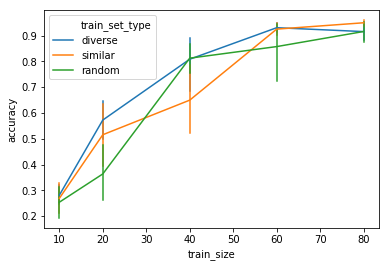

In [7]:
sns.lineplot(data=results_df, 
             x='train_size', y='accuracy', hue='train_set_type',
             err_style='bars')